In [1]:
from Architectures.AE import AE1
from Data.load import load
import numpy as np
from Metrics.metrics import SSIM
import json
from matplotlib import pyplot as plt
from Tests.classifier import classifier_test

In this notebook I check what the minimum amount of channels needed for each conv layer is. To find this, I first scale up the number of channels until it stops increasing accuracy of a classifier. This happens around the point (16, 32, 64). From here, we can lower the number of channels in each layer, starting with 64 and go as low as we can without decreasing the score of the classifier. Every model compresses the images with the same compression ratio (same latent space cardinality), so we are only looking at the necessary channels to achieve satisfactory compression under this compression ratio. I have chosen 256 as the dimensionality in question.

In [42]:
train, test = load("Pre-processed/CN", take=100)

Loading images: 100%|██████████| 100/100 [00:43<00:00,  2.28it/s]


In [ ]:
# To keep things comparable, each structure should use the same number of layers.
structures = [
    # To figure out the minimum amount of channels we can first "blow up" the parameters and see when that stops working
    # and work backwards to see when the score starts to decrease again.
    # (1, 1, 1),
    # (1, 2, 4),
    # (2, 4, 8),
    # (4, 8, 16),
    # (8, 16, 32),
    # (16, 32, 64),
    # (32, 64, 128),
    # (64, 128, 256),
    (128, 256, 512), # Yet to be computed: my computer could not handle this :(
]

scores = {
    str(s):None for s in structures # Will be populated later
}

for structure in structures:
    ae = AE1(train.shape, structure, latent_dim = 256) # Every structure is compressed to the same space.
    hist = ae.train(train, epochs = 100)
    pred = ae.decode(ae.encode(test))
    scores[str(structure)] = {
        "SSIM":SSIM(pred.reshape(test.shape), test),
        # "MSE":hist.history['val_loss'][-1],
        "val_loss":hist.history['val_loss']
    }
    
    with open("Cache/test_optimal_depths1.json", "w") as f: # Log results in case we run OOM
        json.dump(scores, f)
    ae.save(f"Trained Models/AE/optimal_depths/{structure}")
    # break

Interpreted image shape: (80, 96, 80, 1)
Pre-flattened latent shape: (None, 10, 12, 10, 256)


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 256)            │    79,751,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │    81,827,969 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,579,521 (616.38 MB)

 Trainable params: 161,579,521 (616.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 264s 52s/step - loss: 0.2117 - val_loss: 0.4301
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 171s 32s/step - loss: 0.2343 - val_loss: 0.0852
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 278s 57s/step - loss: 0.0835 - val_loss: 0.1117
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 165s 33s/step - loss: 0.0906 - val_loss: 0.0562
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 155s 27s/step - loss: 0.0726 - val_loss: 0.0634
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 210s 42s/step - loss: 0.0618 - val_loss: 0.0543
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 118s 20s/step - loss: 0.0517 - val_loss: 0.0474
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 135s 22s/step - loss: 0.0493 - val_loss: 0.0479
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 132s 25s/step - loss: 0.0476 - val_loss: 0.0442
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 231s 46s/step - loss: 0.0464 - val_loss: 0.0433
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 275s 58s/step - loss: 0.0439 - val_loss: 0.0406
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 120s 21s/step - loss: 0.0

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 256)            │   161,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │   169,406,721 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,121,409 (1.23 GB)

 Trainable params: 331,121,409 (1.23 GB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


In [2]:
# Since we logged the output of the previous cell we can just read from cache ;)
with open("Cache/test_optimal_depths.json", "r") as f:
    scores = json.load(f)

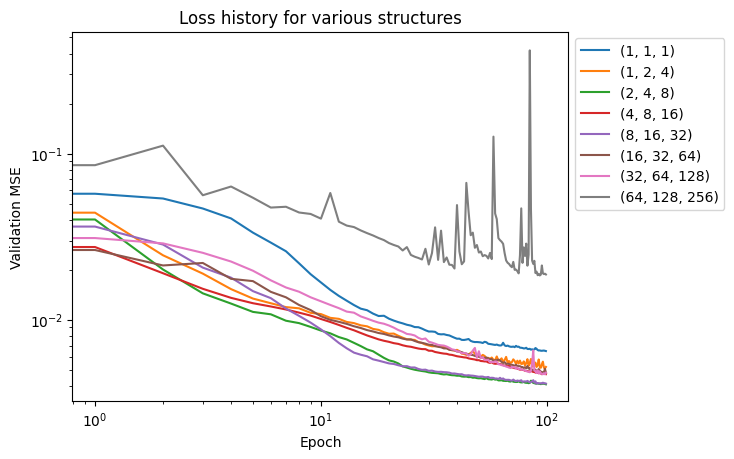

In [ ]:
# Check out the loss history
for structure in scores:
    if scores[structure] is None: continue
    plt.plot(scores[structure]["val_loss"], label = structure)

plt.title("Loss history for various structures")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Epoch")
plt.ylabel("Validation MSE")
plt.legend(loc="upper left",bbox_to_anchor=(1, 0.5, 0.5, 0.5))

Here we see something fascinating: the largest models do not seem to converge. This could be due to exploding gradients, which could be resolved with l2 regularization and batch normalization layers.

In [40]:
{s:scores[s]["SSIM"] for s in scores if scores[s]}

{'(1, 1, 1)': 0.5481646788930402,
 '(1, 2, 4)': 0.6105361137947669,
 '(2, 4, 8)': 0.6844198625535345,
 '(4, 8, 16)': 0.7137382020981196,
 '(8, 16, 32)': 0.726889971288021,
 '(16, 32, 64)': 0.7338224314763475,
 '(32, 64, 128)': 0.7106755052219722,
 '(64, 128, 256)': 0.45270871577006866}

We see that the highest scoring structure is (16, 32, 64)

In [2]:
ae = AE1.open("Trained Models/AE/optimal_depths/(16, 32, 64)")

Models loaded and compiled successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


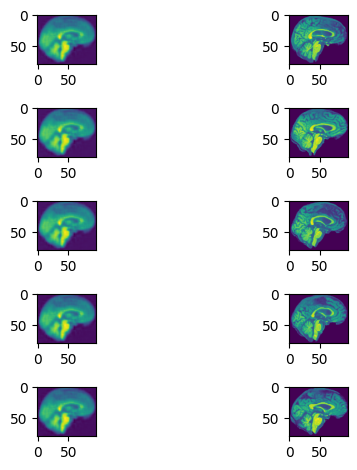

In [60]:
latent = ae.encode(test)
recon = ae.decode(latent)
display_amount = 5
for test_idx in range(display_amount):
    plt.subplot(display_amount,2,1+2*test_idx)
    plt.imshow(np.rot90(recon[test_idx][40]))
    plt.subplot(display_amount,2,2+2*test_idx)
    plt.imshow(np.rot90(test[test_idx][40]))

plt.tight_layout()

Since all the images look the same, I suspect we have lost a lot of structural information. If so, we will not be able to classify the different groups with high accuracy.

Loading AD: 100%|██████████| 26/26 [00:10<00:00,  2.54it/s]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


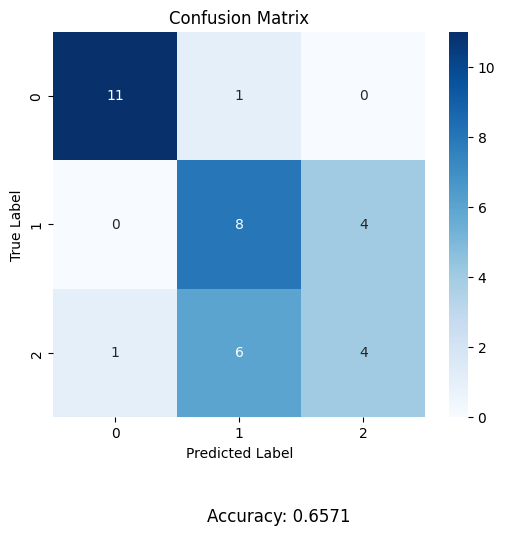

In [3]:
classifier_test(ae, *load(subdirs=["CN","MCI","AD"], take=30, train_test_split=0.6))